In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal

# 1.

In [4]:
PATH = 'drive/MyDrive/owid-covid-data.csv'

In [5]:
data = pd.read_csv(PATH)
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165403,ZWE,Africa,Zimbabwe,2022-02-25,235467.0,500.0,348.143,5392.0,2.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165404,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165405,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165406,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
location_name = 'Russia'
date_begin = '2020-03-03'
target1 = 'total_cases'
target2 = 'new_cases'
ru_columns = ['date'] + [target1, target2]

In [8]:
ru_data = data.query('location == @location_name')
ru_data['date'] = pd.to_datetime(ru_data['date'])
ru_data = ru_data[ru_data['date'] >= date_begin]
ru_data['new_cases'] = ru_data['new_cases'].replace({0: 1})
ru_data = ru_data[ru_columns]
train_set = ru_data.iloc[:50, :]
test_set = ru_data.iloc[50:, :]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
ru_data['date'].min()

Timestamp('2020-03-03 00:00:00')

In [10]:
print(train_set.shape, test_set.shape)
# train_set.head(3)
# test_set.head(3)

(50, 3) (679, 3)


# 2.

In [11]:
figsize = (20, 12)
legend_fontsize = 14

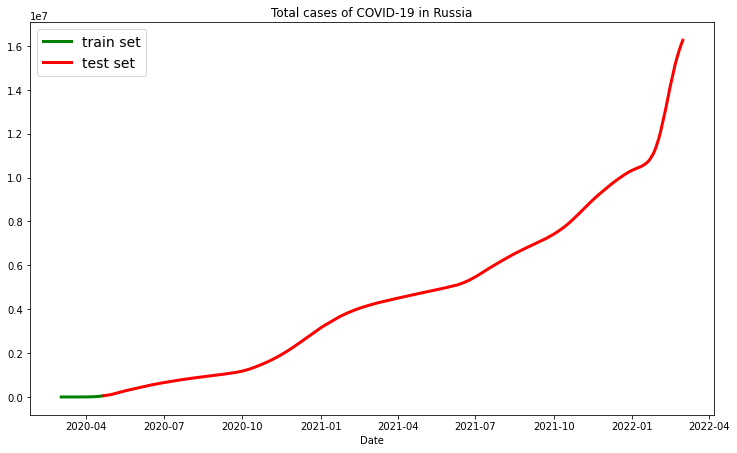

In [12]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(221)
ax.set_xlabel("Date")
ax.plot(train_set["date"], train_set[target1], label="train set", c='g', linewidth=3)
ax.plot(test_set["date"], test_set[target1], label="test set", c='r', linewidth=3)
ax.set_title("Total cases of COVID-19 in Russia")
ax.legend(fontsize=legend_fontsize)
plt.tight_layout()
plt.show()

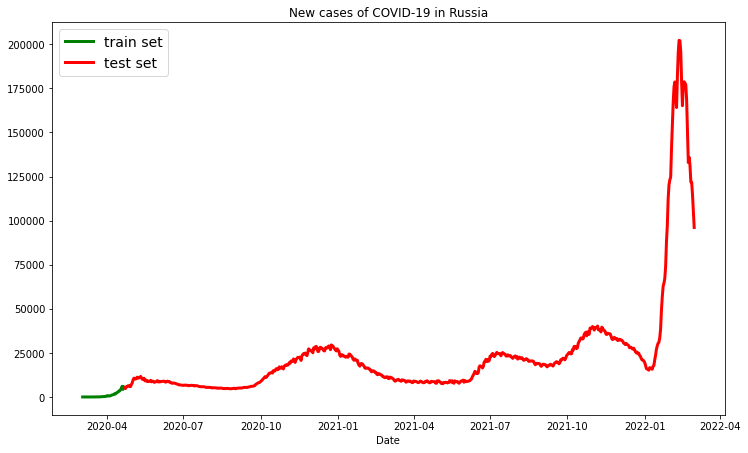

In [13]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(221)
ax.set_xlabel("Date")
ax.plot(train_set["date"], train_set[target2], label="train set", c='g', linewidth=3)
ax.plot(test_set["date"], test_set[target2], label="test set", c='r', linewidth=3)
ax.set_title("New cases of COVID-19 in Russia")
ax.legend(fontsize=legend_fontsize)
plt.tight_layout()
plt.show()

In [14]:
train_set.columns

Index(['date', 'total_cases', 'new_cases'], dtype='object')

### a.

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [15]:
train_set['days'] = train_set['date'].sub(pd.Timestamp(date_begin)).dt.days + 1
test_set['days'] = test_set['date'].sub(pd.Timestamp(date_begin)).dt.days + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
y_train = train_set[['total_cases', 'new_cases']].copy()
X_train = train_set['days'].copy()
y_test = test_set[['total_cases', 'new_cases']].copy()
X_test = test_set['days'].copy()

In [17]:
days = ru_data['date'].sub(pd.Timestamp(date_begin)).dt.days + 1
days = days.values
log_total = np.log(ru_data['total_cases'].values)
log_new = np.log(ru_data['new_cases'].values)

In [18]:
def linear_preds(reg, X_train, y_train, X_test, y_test, target):
  reg.fit(X_train.values.reshape(-1, 1), np.log(y_train[target])) 
  predictions = reg.predict(X_test.values.reshape(-1, 1))
  return predictions

def plot_pred(predictions, reg, X_train, y_train, X_test, y_test, target, log_scale=False, draw_plot=True):
  predictions = np.exp(predictions)
  if target == 'total_cases':
    ymin, ymax = 0, 1e7
  elif target == 'new_cases':
    ymin, ymax = 0, 200000
  if draw_plot:
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(221)
    ax.set_xlabel("Day")
    ax.plot(X_test, y_test[target], label="test set", c='r', linewidth=3)
    ax.plot(X_train, y_train[target], label="train set", c='g', linewidth=3)
    ax.plot(X_test, predictions, label="predictions", c='b', linewidth=3)
    if log_scale:
      fig2 = plt.figure(figsize=figsize)
      ax2 = fig2.add_subplot(221)
      ax2.set_xlabel("Day")
      ax2.plot(X_test, np.log(y_test[target]), label="test set", c='r', linewidth=3)
      ax2.plot(X_train, np.log(y_train[target]), label="train set", c='g', linewidth=3)
      ax2.plot(X_test, np.log(predictions), label="predictions", c='b', linewidth=3)
      ax2.set_title(f'{target} of COVID-19 in Russia (log_scale)')
      ax2.legend(fontsize=legend_fontsize)
    ax.set_ylim([ymin, ymax])
    ax.set_title(f'{target} of COVID-19 in Russia')
    ax.legend(fontsize=legend_fontsize)
    plt.tight_layout()
    plt.show()
  print(f'ln({target}) ~ w_1 * days + w_0: \nw_1 = {reg.coef_[0]}\nw_0 = {reg.intercept_}\n')

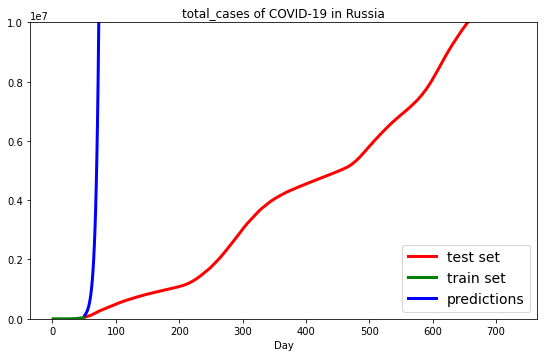

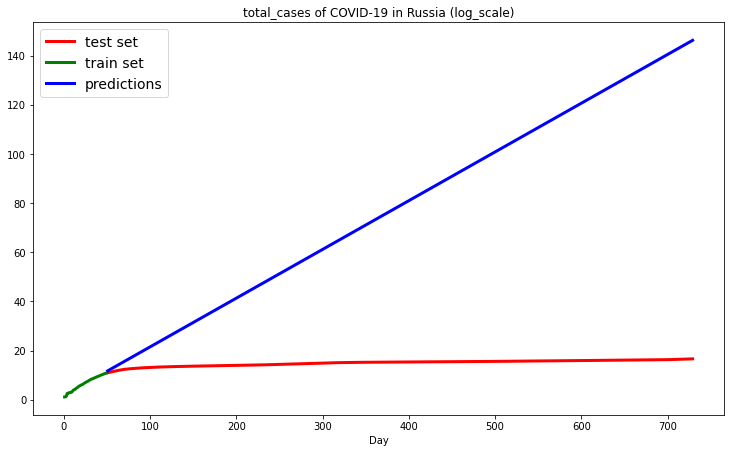

ln(total_cases) ~ w_1 * days + w_0: 
w_1 = 0.19829091233588567
w_0 = 1.62244623644881

Posterior noise std for total_cases:  0.35258587251021306


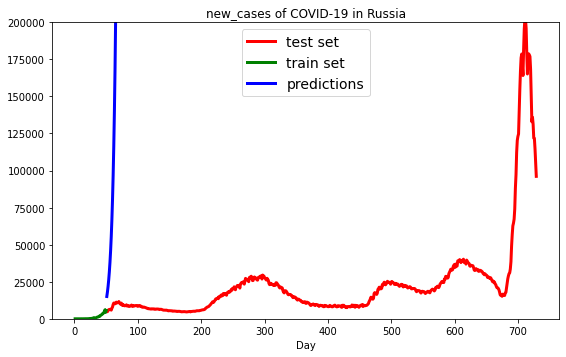

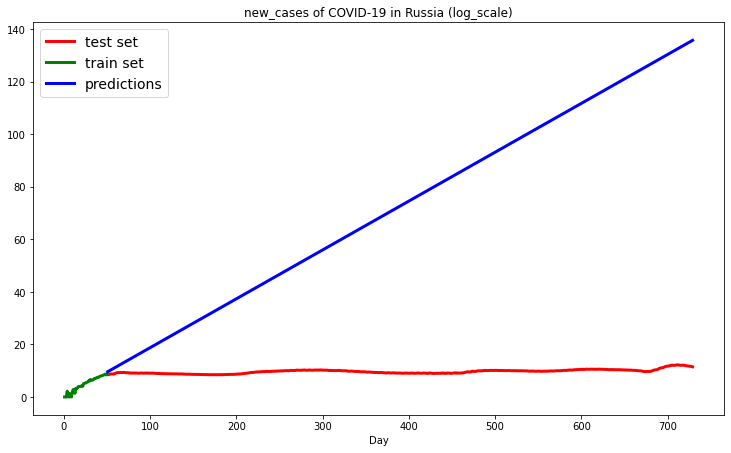

ln(new_cases) ~ w_1 * days + w_0: 
w_1 = 0.18596309168510522
w_0 = 0.13472442721454136

Posterior noise std for new_cases:  0.6021297649662455


In [19]:
targets = [target1, target2]
total_reg = LinearRegression() 
total_preds = linear_preds(total_reg, X_train, y_train, X_test, y_test, targets[0])
plot_pred(total_preds, total_reg, X_train, y_train, X_test, y_test, targets[0], log_scale=True)
poster_std_total = np.std(log_total[:50] - total_preds[:50], ddof=1)
print('Posterior noise std for total_cases: ', poster_std_total)


new_reg = LinearRegression()
new_preds = linear_preds(new_reg, X_train, y_train, X_test, y_test, targets[1])
plot_pred(new_preds, new_reg, X_train, y_train, X_test, y_test, targets[1], log_scale=True)
poster_std_new = np.std(log_new[:50] - new_preds[:50], ddof=1)
print('Posterior noise std for new_cases: ', poster_std_new)

### b.

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [20]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    xs = X_train + X_test
    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, w[0] + w[1]*xs, 'k-', lw=.4)
    plt.ylim((-3, 3))
    plt.xlim((-3, 3))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

def get_likelihood(px, py, sigma=.5):
    return lambda x : np.exp(-(x[0] + x[1]*px - py) ** 2) / (2 * sigma * np.sqrt(2.*np.pi))

def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [21]:
sigma_wide_distribution = 500
mu_total, sigma_total = np.array([0, 0]), sigma_wide_distribution*np.array([[1, 0], [0, 1]])
mu_new, sigma_new = np.array([0, 0]), sigma_wide_distribution*np.array([[1, 0], [0, 1]])

In [22]:
for i in range(50):
    mu_total, sigma_total = bayesian_update(mu_total, 
                                            sigma_total, 
                                            days[i], 
                                            log_total[i], 
                                            sigma_noise=poster_std_total)
for i in range(50):
    mu_new, sigma_new = bayesian_update(mu_total, 
                                        sigma_new, 
                                        days[i], 
                                        log_new[i], 
                                        sigma_noise=poster_std_new)

In [23]:
print(f'mu_new: {mu_new}\nsigma_new: {sigma_new}')
print(f'mu_new: {mu_total}\nsigma_new: {sigma_total}')

mu_new: [1.73836671 0.19147089]
sigma_new: [[ 2.98909344e-02 -8.87849520e-04]
 [-8.87849520e-04  3.48181332e-05]]
mu_new: [1.6224131 0.1982919]
sigma_new: [[ 1.02495828e-02 -3.04443052e-04]
 [-3.04443052e-04  1.19390026e-05]]


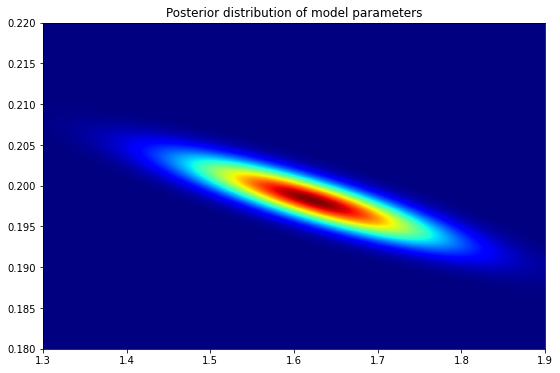

In [24]:
# визуализируем для total_cases

N = 2000
xs = np.linspace(-3, 3, N)
X = np.linspace(1.3, 1.9, N)
Y = np.linspace(0.18, 0.22, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_normal.pdf(pos, mean=mu_total, cov=sigma_total)

def myplot_heatmap(Z):
    # Make the plot
    # plt.axis('equal')
    plt.figure(figsize=(9, 6))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.title("Posterior distribution of model parameters")

myplot_heatmap(Z)

### c.

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [25]:
pred_dates = [pd.to_datetime('2020-05-01'), pd.to_datetime('2020-06-01'), pd.to_datetime('2020-09-01')]

In [28]:
# fig = plt.figure(figsize=(10, 8))
# myplot_sample_lines(mu_total, sigma_total, 100, points=log_total)
# plt.xlim((0, 100))
# plt.show()